In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import scipy.stats as stats

In [3]:
df=pd.DataFrame(pd.read_csv('./data/Building_Permits.csv', encoding='gbk', header=0, engine='python'))

In [4]:
df.describe()

/home/xiaoyu/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Permit Type,Street Number,Unit,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Revised Cost,Existing Units,Proposed Units,Plansets,Existing Construction Type,Proposed Construction Type,Supervisor District,Zipcode,Record ID
count,198900.000000,198900.000000,29479.000000,156116.000000,156032.000000,1.608340e+05,1.928340e+05,147362.000000,147989.000000,161591.000000,155534.000000,155738.000000,197183.000000,197184.000000,1.989000e+05
mean,7.522323,1121.728944,78.517182,5.705773,5.745043,1.689554e+05,1.328562e+05,15.666164,16.510950,1.274650,4.072878,4.089529,5.538403,94115.500558,1.162057e+12
std,1.457451,1135.768948,326.981324,8.613455,8.613284,3.630386e+06,3.584903e+06,74.476321,75.220444,22.407345,1.585756,1.578766,2.887041,9.270131,4.918367e+11
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,94102.000000,1.293532e+10
25%,8.000000,235.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.310000e+12
50%,8.000000,710.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.370000e+12
75%,8.000000,1700.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.440000e+12
max,8.000000,8400.000000,6004.000000,78.000000,78.000000,5.379586e+08,7.805000e+08,1907.000000,1911.000000,9000.000000,5.000000,5.000000,11.000000,94158.000000,1.500000e+12


In [5]:
nomdf=pd.DataFrame(df['Street Suffix'])
nomdf.groupby('Street Suffix').size()

Street Suffix
Al        83
Av     43219
Bl      3555
Cr        97
Ct       667
Dr      3267
Hl         1
Hy       240
Ln       354
No         2
Pk       128
Pl       538
Pz       210
Rd       389
Rw         5
So         2
St    138358
Sw         2
Tr      1466
Wk         9
Wy      3540
dtype: int64

In [6]:
numdf=pd.DataFrame(df['Number of Existing Stories'])
numdf.dropna().describe()

,Number of Existing Stories
count,156116.000000
mean,5.705773
std,8.613455
min,0.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,78.000000


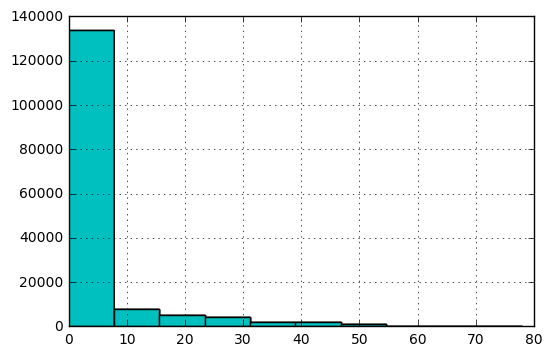

In [19]:
df['Number of Existing Stories'].hist().get_figure()

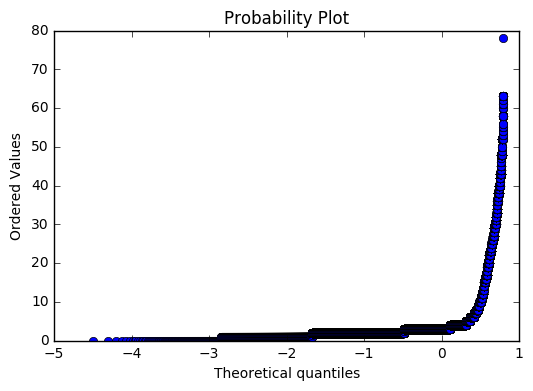

In [96]:
stats.probplot(df['Number of Existing Stories'], dist='norm', plot=pylab)
pylab.show()

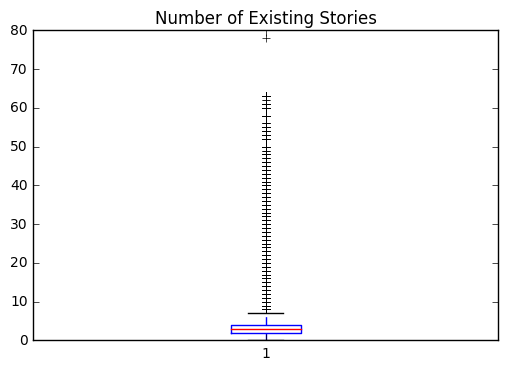

In [21]:
plt.boxplot(df['Number of Existing Stories'].dropna())
plt.title('Number of Existing Stories')
plt.show()

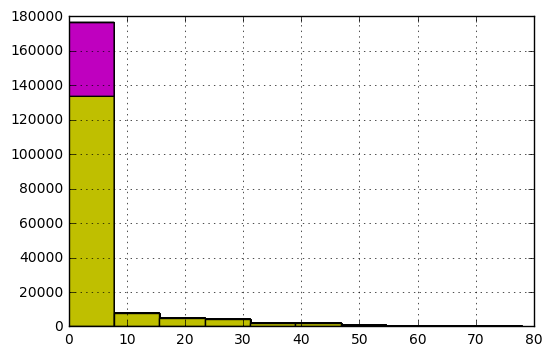

In [107]:
plt.clf()
mode=df['Number of Existing Stories'].mode()[0]
df['Number of Existing Stories'].fillna(mode).hist().get_figure()
df['Number of Existing Stories'].dropna().hist().get_figure()

In [98]:
df.corr()

,Permit Type,Street Number,Unit,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Revised Cost,Existing Units,Proposed Units,Plansets,Existing Construction Type,Proposed Construction Type,Supervisor District,Zipcode,Record ID
Permit Type,1.000000,-0.002281,0.031978,0.057106,0.055431,-0.120878,-0.120083,-0.003030,-0.013665,-0.011480,-0.004265,-0.033203,-0.049109,-0.012200,-0.015625
Street Number,-0.002281,1.000000,-0.040662,-0.218557,-0.215047,-0.011152,-0.010828,-0.054865,-0.055468,-0.003298,0.228214,0.224609,-0.131445,0.107763,-0.039811
Unit,0.031978,-0.040662,1.000000,0.167038,0.168811,-0.009094,-0.007559,0.222569,0.227423,-0.081970,-0.217840,-0.219103,-0.027666,0.003612,-0.275472
Number of Existing Stories,0.057106,-0.218557,0.167038,1.000000,0.997356,0.030248,0.039181,0.295527,0.294521,0.009473,-0.679218,-0.686347,-0.169487,-0.341470,-0.147272
Number of Proposed Stories,0.055431,-0.215047,0.168811,0.997356,1.000000,0.050336,0.049165,0.294658,0.304492,0.009547,-0.688179,-0.683090,-0.168097,-0.342105,-0.147113
Estimated Cost,-0.120878,-0.011152,-0.009094,0.030248,0.050336,1.000000,0.978798,0.014161,0.070412,0.001451,-0.048703,-0.056787,0.009876,-0.010436,0.003475
Revised Cost,-0.120083,-0.010828,-0.007559,0.039181,0.049165,0.978798,1.000000,0.015667,0.065279,0.001309,-0.057447,-0.048473,0.007252,-0.007235,0.004614
Existing Units,-0.003030,-0.054865,0.222569,0.295527,0.294658,0.014161,0.015667,1.000000,0.994071,0.001243,-0.272255,-0.273619,-0.045800,-0.131599,-0.020989
Proposed Units,-0.013665,-0.055468,0.227423,0.294521,0.304492,0.070412,0.065279,0.994071,1.000000,0.001548,-0.275976,-0.289255,-0.040889,-0.137086,-0.018551
Plansets,-0.011480,-0.003298,-0.081970,0.009473,0.009547,0.001451,0.001309,0.001243,0.001548,1.000000,-0.013277,-0.013005,0.001314,-0.005074,-0.001815
